In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/KAG_conversion_data.csv.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df.shape

(1143, 11)

In [4]:
le=LabelEncoder()

In [5]:
df['gender']=le.fit_transform(df['gender'])

In [6]:
df=df.drop(['ad_id','age'],axis='columns')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   xyz_campaign_id      1143 non-null   int64  
 1   fb_campaign_id       1143 non-null   int64  
 2   gender               1143 non-null   int32  
 3   interest             1143 non-null   int64  
 4   Impressions          1143 non-null   int64  
 5   Clicks               1143 non-null   int64  
 6   Spent                1143 non-null   float64
 7   Total_Conversion     1143 non-null   int64  
 8   Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 76.0 KB


In [8]:
df.dtypes

xyz_campaign_id          int64
fb_campaign_id           int64
gender                   int32
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [9]:
df.value_counts()

xyz_campaign_id  fb_campaign_id  gender  interest  Impressions  Clicks  Spent       Total_Conversion  Approved_Conversion
936              123532          1       65        152          0       0.000000    1                 1                      2
916              103916          1       15        7350         1       1.430000    2                 1                      1
1178             144618          1       65        188440       40      60.730000   2                 1                      1
                 144624          1       16        159478       20      33.900000   3                 1                      1
                 144623          1       15        506916       89      133.699999  2                 2                      1
                                                                                                                            ..
936              116367          0       29        164754       49      67.980000   2                 1             

In [10]:
df.isnull().sum()

xyz_campaign_id        0
fb_campaign_id         0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [11]:
df.describe()

,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.000000,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,1067.382327,133783.989501,0.517935,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,121.629393,20500.308622,0.499897,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,916.000000,103916.000000,0.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,936.000000,115716.000000,0.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1178.000000,144549.000000,1.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1178.000000,144657.500000,1.000000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1178.000000,179982.000000,1.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [12]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
xyz_campaign_id,9.0,0.478237,0.291289,0.086118,0.284968,0.469729,0.495273,1.0
fb_campaign_id,9.0,0.484218,0.298675,0.038037,0.344170,0.406978,0.595753,1.0
gender,9.0,0.079323,0.354341,-0.168725,-0.067059,-0.027559,0.038037,1.0
interest,9.0,0.251148,0.336281,-0.047230,0.070226,0.101973,0.272282,1.0
Impressions,9.0,0.598401,0.387422,-0.067059,0.439439,0.684249,0.948514,1.0
Clicks,9.0,0.554696,0.408434,-0.168725,0.406978,0.559526,0.948514,1.0
Spent,9.0,0.567475,0.405883,-0.125022,0.403532,0.593178,0.970386,1.0
Total_Conversion,9.0,0.542272,0.357646,-0.027559,0.344170,0.694632,0.812838,1.0
Approved_Conversion,9.0,0.480813,0.344727,0.025350,0.257658,0.559526,0.684249,1.0


In [13]:
df.mean()

xyz_campaign_id          1067.382327
fb_campaign_id         133783.989501
gender                      0.517935
interest                   32.766404
Impressions            186732.132983
Clicks                     33.390201
Spent                      51.360656
Total_Conversion            2.855643
Approved_Conversion         0.944007
dtype: float64

In [14]:
df.max()

xyz_campaign_id        1.178000e+03
fb_campaign_id         1.799820e+05
gender                 1.000000e+00
interest               1.140000e+02
Impressions            3.052003e+06
Clicks                 4.210000e+02
Spent                  6.399500e+02
Total_Conversion       6.000000e+01
Approved_Conversion    2.100000e+01
dtype: float64

In [15]:
df.min()

xyz_campaign_id           916.0
fb_campaign_id         103916.0
gender                      0.0
interest                    2.0
Impressions                87.0
Clicks                      0.0
Spent                       0.0
Total_Conversion            0.0
Approved_Conversion         0.0
dtype: float64

In [16]:
x=df.drop(['gender'],axis='columns')

In [17]:
y=df.gender.values

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [19]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

94.46064139941691

In [20]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       165
           1       0.94      0.95      0.95       178

    accuracy                           0.94       343
   macro avg       0.94      0.94      0.94       343
weighted avg       0.94      0.94      0.94       343



In [21]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

55.68513119533528

In [22]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

           0       0.62      0.21      0.31       165
           1       0.55      0.88      0.67       178

    accuracy                           0.56       343
   macro avg       0.58      0.54      0.49       343
weighted avg       0.58      0.56      0.50       343



In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

57.7259475218659

In [25]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       165
           1       0.59      0.63      0.61       178

    accuracy                           0.58       343
   macro avg       0.58      0.58      0.57       343
weighted avg       0.58      0.58      0.58       343



In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [27]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest , pred_ada)*100
accu_ada

97.37609329446065

In [28]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       165
           1       0.98      0.97      0.97       178

    accuracy                           0.97       343
   macro avg       0.97      0.97      0.97       343
weighted avg       0.97      0.97      0.97       343



In [29]:
from sklearn.ensemble import BaggingClassifier

In [30]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

92.71137026239067

In [31]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       165
           1       0.95      0.90      0.93       178

    accuracy                           0.93       343
   macro avg       0.93      0.93      0.93       343
weighted avg       0.93      0.93      0.93       343



In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

58.60058309037901

In [34]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

           0       0.68      0.27      0.38       165
           1       0.56      0.88      0.69       178

    accuracy                           0.59       343
   macro avg       0.62      0.57      0.54       343
weighted avg       0.62      0.59      0.54       343



In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

81.92419825072886

In [38]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       165
           1       0.82      0.83      0.83       178

    accuracy                           0.82       343
   macro avg       0.82      0.82      0.82       343
weighted avg       0.82      0.82      0.82       343



In [39]:
from sklearn.svm import SVC

In [40]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_siv=svc.predict(xtest)
accu_siv=accuracy_score(ytest,pre_siv)*100
accu_siv

54.81049562682215

In [41]:
print(classification_report(ytest,pre_siv))

              precision    recall  f1-score   support

           0       0.60      0.19      0.29       165
           1       0.54      0.88      0.67       178

    accuracy                           0.55       343
   macro avg       0.57      0.53      0.48       343
weighted avg       0.57      0.55      0.48       343



In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

88.92128279883383

In [44]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       165
           1       0.89      0.89      0.89       178

    accuracy                           0.89       343
   macro avg       0.89      0.89      0.89       343
weighted avg       0.89      0.89      0.89       343



In [45]:
from catboost import CatBoostRegressor

In [46]:
cat=CatBoostRegressor()
cat.fit(xtrain,ytrain)

Learning rate set to 0.03751
0:	learn: 0.4913276	total: 378ms	remaining: 6m 17s
1:	learn: 0.4837165	total: 381ms	remaining: 3m 9s
2:	learn: 0.4767770	total: 384ms	remaining: 2m 7s
3:	learn: 0.4699399	total: 387ms	remaining: 1m 36s
4:	learn: 0.4635431	total: 389ms	remaining: 1m 17s
5:	learn: 0.4562091	total: 392ms	remaining: 1m 4s
6:	learn: 0.4508986	total: 394ms	remaining: 55.9s
7:	learn: 0.4451291	total: 396ms	remaining: 49.2s
8:	learn: 0.4403362	total: 399ms	remaining: 43.9s
9:	learn: 0.4360162	total: 401ms	remaining: 39.7s
10:	learn: 0.4302390	total: 403ms	remaining: 36.3s
11:	learn: 0.4261072	total: 406ms	remaining: 33.4s
12:	learn: 0.4209830	total: 409ms	remaining: 31.1s
13:	learn: 0.4170980	total: 411ms	remaining: 29s
14:	learn: 0.4130995	total: 414ms	remaining: 27.2s
15:	learn: 0.4098807	total: 419ms	remaining: 25.7s
16:	learn: 0.4067348	total: 422ms	remaining: 24.4s
17:	learn: 0.4025418	total: 424ms	remaining: 23.1s
18:	learn: 0.3993144	total: 427ms	remaining: 22s
19:	learn: 0.

197:	learn: 0.2198866	total: 865ms	remaining: 3.5s
198:	learn: 0.2189923	total: 867ms	remaining: 3.49s
199:	learn: 0.2178348	total: 869ms	remaining: 3.48s
200:	learn: 0.2171744	total: 871ms	remaining: 3.46s
201:	learn: 0.2164047	total: 873ms	remaining: 3.45s
202:	learn: 0.2157917	total: 875ms	remaining: 3.44s
203:	learn: 0.2147777	total: 878ms	remaining: 3.42s
204:	learn: 0.2141246	total: 880ms	remaining: 3.41s
205:	learn: 0.2132381	total: 882ms	remaining: 3.4s
206:	learn: 0.2125429	total: 884ms	remaining: 3.39s
207:	learn: 0.2117428	total: 886ms	remaining: 3.37s
208:	learn: 0.2113663	total: 888ms	remaining: 3.36s
209:	learn: 0.2111654	total: 891ms	remaining: 3.35s
210:	learn: 0.2099768	total: 894ms	remaining: 3.34s
211:	learn: 0.2095905	total: 896ms	remaining: 3.33s
212:	learn: 0.2088847	total: 898ms	remaining: 3.32s
213:	learn: 0.2083292	total: 900ms	remaining: 3.31s
214:	learn: 0.2078062	total: 902ms	remaining: 3.29s
215:	learn: 0.2075567	total: 904ms	remaining: 3.28s
216:	learn: 0.

394:	learn: 0.1422056	total: 1.34s	remaining: 2.05s
395:	learn: 0.1420592	total: 1.34s	remaining: 2.05s
396:	learn: 0.1417989	total: 1.34s	remaining: 2.04s
397:	learn: 0.1415038	total: 1.35s	remaining: 2.04s
398:	learn: 0.1412055	total: 1.35s	remaining: 2.04s
399:	learn: 0.1410682	total: 1.35s	remaining: 2.03s
400:	learn: 0.1408499	total: 1.36s	remaining: 2.03s
401:	learn: 0.1406066	total: 1.36s	remaining: 2.02s
402:	learn: 0.1403982	total: 1.36s	remaining: 2.02s
403:	learn: 0.1403112	total: 1.36s	remaining: 2.01s
404:	learn: 0.1399667	total: 1.37s	remaining: 2.01s
405:	learn: 0.1399004	total: 1.37s	remaining: 2s
406:	learn: 0.1397568	total: 1.37s	remaining: 2s
407:	learn: 0.1396666	total: 1.37s	remaining: 1.99s
408:	learn: 0.1394802	total: 1.38s	remaining: 2s
409:	learn: 0.1393939	total: 1.38s	remaining: 1.99s
410:	learn: 0.1390746	total: 1.39s	remaining: 1.99s
411:	learn: 0.1390248	total: 1.39s	remaining: 1.98s
412:	learn: 0.1387855	total: 1.39s	remaining: 1.97s
413:	learn: 0.1387073

555:	learn: 0.1148496	total: 1.81s	remaining: 1.45s
556:	learn: 0.1146951	total: 1.81s	remaining: 1.44s
557:	learn: 0.1146546	total: 1.82s	remaining: 1.44s
558:	learn: 0.1145547	total: 1.82s	remaining: 1.44s
559:	learn: 0.1144572	total: 1.82s	remaining: 1.43s
560:	learn: 0.1144076	total: 1.83s	remaining: 1.43s
561:	learn: 0.1142611	total: 1.83s	remaining: 1.43s
562:	learn: 0.1141297	total: 1.83s	remaining: 1.42s
563:	learn: 0.1140538	total: 1.84s	remaining: 1.42s
564:	learn: 0.1139450	total: 1.84s	remaining: 1.42s
565:	learn: 0.1138057	total: 1.84s	remaining: 1.41s
566:	learn: 0.1136860	total: 1.84s	remaining: 1.41s
567:	learn: 0.1134895	total: 1.85s	remaining: 1.41s
568:	learn: 0.1134226	total: 1.85s	remaining: 1.41s
569:	learn: 0.1133784	total: 1.86s	remaining: 1.4s
570:	learn: 0.1133400	total: 1.86s	remaining: 1.4s
571:	learn: 0.1133043	total: 1.86s	remaining: 1.4s
572:	learn: 0.1132295	total: 1.87s	remaining: 1.39s
573:	learn: 0.1131924	total: 1.87s	remaining: 1.39s
574:	learn: 0.1

726:	learn: 0.0957927	total: 2.29s	remaining: 859ms
727:	learn: 0.0956631	total: 2.29s	remaining: 855ms
728:	learn: 0.0956048	total: 2.29s	remaining: 853ms
729:	learn: 0.0955156	total: 2.3s	remaining: 850ms
730:	learn: 0.0954127	total: 2.3s	remaining: 846ms
731:	learn: 0.0953492	total: 2.3s	remaining: 843ms
732:	learn: 0.0953230	total: 2.31s	remaining: 840ms
733:	learn: 0.0952253	total: 2.31s	remaining: 837ms
734:	learn: 0.0949717	total: 2.31s	remaining: 834ms
735:	learn: 0.0947380	total: 2.32s	remaining: 831ms
736:	learn: 0.0946711	total: 2.32s	remaining: 828ms
737:	learn: 0.0946031	total: 2.32s	remaining: 825ms
738:	learn: 0.0945555	total: 2.33s	remaining: 821ms
739:	learn: 0.0944883	total: 2.33s	remaining: 818ms
740:	learn: 0.0944309	total: 2.33s	remaining: 815ms
741:	learn: 0.0941719	total: 2.33s	remaining: 812ms
742:	learn: 0.0940685	total: 2.34s	remaining: 808ms
743:	learn: 0.0938905	total: 2.34s	remaining: 805ms
744:	learn: 0.0936683	total: 2.34s	remaining: 802ms
745:	learn: 0.0

888:	learn: 0.0798423	total: 2.77s	remaining: 345ms
889:	learn: 0.0798017	total: 2.77s	remaining: 342ms
890:	learn: 0.0796728	total: 2.77s	remaining: 339ms
891:	learn: 0.0796396	total: 2.77s	remaining: 336ms
892:	learn: 0.0795483	total: 2.78s	remaining: 334ms
893:	learn: 0.0794296	total: 2.79s	remaining: 330ms
894:	learn: 0.0792715	total: 2.79s	remaining: 327ms
895:	learn: 0.0791367	total: 2.79s	remaining: 324ms
896:	learn: 0.0789993	total: 2.8s	remaining: 321ms
897:	learn: 0.0788679	total: 2.8s	remaining: 318ms
898:	learn: 0.0788381	total: 2.81s	remaining: 315ms
899:	learn: 0.0786834	total: 2.81s	remaining: 312ms
900:	learn: 0.0785345	total: 2.81s	remaining: 309ms
901:	learn: 0.0785155	total: 2.81s	remaining: 306ms
902:	learn: 0.0784439	total: 2.82s	remaining: 303ms
903:	learn: 0.0784047	total: 2.82s	remaining: 300ms
904:	learn: 0.0783607	total: 2.82s	remaining: 297ms
905:	learn: 0.0783208	total: 2.83s	remaining: 293ms
906:	learn: 0.0782894	total: 2.83s	remaining: 290ms
907:	learn: 0.

In [47]:
cat.score(xtest,ytest)*100

89.12040252537227

In [48]:
from catboost import CatBoostClassifier

In [49]:
cat2=CatBoostRegressor()
cat2.fit(xtrain,ytrain)

Learning rate set to 0.03751
0:	learn: 0.4913276	total: 2.5ms	remaining: 2.5s
1:	learn: 0.4837165	total: 4.84ms	remaining: 2.42s
2:	learn: 0.4767770	total: 8.95ms	remaining: 2.98s
3:	learn: 0.4699399	total: 11.5ms	remaining: 2.86s
4:	learn: 0.4635431	total: 13.7ms	remaining: 2.72s
5:	learn: 0.4562091	total: 16.3ms	remaining: 2.7s
6:	learn: 0.4508986	total: 18.3ms	remaining: 2.6s
7:	learn: 0.4451291	total: 20.7ms	remaining: 2.57s
8:	learn: 0.4403362	total: 25.2ms	remaining: 2.77s
9:	learn: 0.4360162	total: 27.8ms	remaining: 2.75s
10:	learn: 0.4302390	total: 30.4ms	remaining: 2.73s
11:	learn: 0.4261072	total: 32.8ms	remaining: 2.7s
12:	learn: 0.4209830	total: 34.9ms	remaining: 2.65s
13:	learn: 0.4170980	total: 39ms	remaining: 2.74s
14:	learn: 0.4130995	total: 41.9ms	remaining: 2.75s
15:	learn: 0.4098807	total: 45ms	remaining: 2.77s
16:	learn: 0.4067348	total: 47.3ms	remaining: 2.73s
17:	learn: 0.4025418	total: 49.9ms	remaining: 2.72s
18:	learn: 0.3993144	total: 53.3ms	remaining: 2.75s
19

173:	learn: 0.2342869	total: 477ms	remaining: 2.26s
174:	learn: 0.2330256	total: 479ms	remaining: 2.26s
175:	learn: 0.2322422	total: 482ms	remaining: 2.25s
176:	learn: 0.2311821	total: 484ms	remaining: 2.25s
177:	learn: 0.2308235	total: 486ms	remaining: 2.24s
178:	learn: 0.2307157	total: 489ms	remaining: 2.24s
179:	learn: 0.2301641	total: 492ms	remaining: 2.24s
180:	learn: 0.2290004	total: 495ms	remaining: 2.24s
181:	learn: 0.2276567	total: 497ms	remaining: 2.23s
182:	learn: 0.2274741	total: 499ms	remaining: 2.23s
183:	learn: 0.2264198	total: 501ms	remaining: 2.22s
184:	learn: 0.2260199	total: 503ms	remaining: 2.22s
185:	learn: 0.2256833	total: 505ms	remaining: 2.21s
186:	learn: 0.2245322	total: 508ms	remaining: 2.21s
187:	learn: 0.2240300	total: 510ms	remaining: 2.2s
188:	learn: 0.2234601	total: 512ms	remaining: 2.2s
189:	learn: 0.2233060	total: 514ms	remaining: 2.19s
190:	learn: 0.2231393	total: 516ms	remaining: 2.19s
191:	learn: 0.2229962	total: 520ms	remaining: 2.19s
192:	learn: 0.

374:	learn: 0.1469650	total: 962ms	remaining: 1.6s
375:	learn: 0.1466977	total: 964ms	remaining: 1.6s
376:	learn: 0.1462468	total: 967ms	remaining: 1.6s
377:	learn: 0.1459855	total: 970ms	remaining: 1.59s
378:	learn: 0.1458029	total: 972ms	remaining: 1.59s
379:	learn: 0.1454184	total: 985ms	remaining: 1.61s
380:	learn: 0.1453258	total: 988ms	remaining: 1.6s
381:	learn: 0.1451080	total: 994ms	remaining: 1.61s
382:	learn: 0.1448524	total: 997ms	remaining: 1.6s
383:	learn: 0.1445957	total: 999ms	remaining: 1.6s
384:	learn: 0.1444180	total: 1s	remaining: 1.6s
385:	learn: 0.1439190	total: 1s	remaining: 1.6s
386:	learn: 0.1437842	total: 1.01s	remaining: 1.59s
387:	learn: 0.1435832	total: 1.01s	remaining: 1.59s
388:	learn: 0.1434517	total: 1.01s	remaining: 1.59s
389:	learn: 0.1432109	total: 1.01s	remaining: 1.59s
390:	learn: 0.1429368	total: 1.02s	remaining: 1.58s
391:	learn: 0.1427839	total: 1.02s	remaining: 1.58s
392:	learn: 0.1425801	total: 1.02s	remaining: 1.58s
393:	learn: 0.1424833	tota

566:	learn: 0.1136860	total: 1.44s	remaining: 1.1s
567:	learn: 0.1134895	total: 1.45s	remaining: 1.1s
568:	learn: 0.1134226	total: 1.45s	remaining: 1.1s
569:	learn: 0.1133784	total: 1.45s	remaining: 1.1s
570:	learn: 0.1133400	total: 1.46s	remaining: 1.09s
571:	learn: 0.1133043	total: 1.46s	remaining: 1.09s
572:	learn: 0.1132295	total: 1.46s	remaining: 1.09s
573:	learn: 0.1131924	total: 1.46s	remaining: 1.09s
574:	learn: 0.1129675	total: 1.47s	remaining: 1.08s
575:	learn: 0.1126757	total: 1.47s	remaining: 1.08s
576:	learn: 0.1126410	total: 1.47s	remaining: 1.08s
577:	learn: 0.1124997	total: 1.47s	remaining: 1.08s
578:	learn: 0.1123856	total: 1.48s	remaining: 1.07s
579:	learn: 0.1123439	total: 1.48s	remaining: 1.07s
580:	learn: 0.1121035	total: 1.48s	remaining: 1.07s
581:	learn: 0.1119694	total: 1.48s	remaining: 1.06s
582:	learn: 0.1118185	total: 1.49s	remaining: 1.06s
583:	learn: 0.1117725	total: 1.49s	remaining: 1.06s
584:	learn: 0.1115305	total: 1.49s	remaining: 1.06s
585:	learn: 0.11

767:	learn: 0.0904611	total: 1.93s	remaining: 582ms
768:	learn: 0.0902705	total: 1.93s	remaining: 579ms
769:	learn: 0.0901665	total: 1.93s	remaining: 577ms
770:	learn: 0.0899851	total: 1.93s	remaining: 575ms
771:	learn: 0.0897676	total: 1.94s	remaining: 572ms
772:	learn: 0.0896192	total: 1.94s	remaining: 569ms
773:	learn: 0.0895240	total: 1.94s	remaining: 567ms
774:	learn: 0.0894205	total: 1.94s	remaining: 564ms
775:	learn: 0.0893371	total: 1.95s	remaining: 562ms
776:	learn: 0.0892617	total: 1.95s	remaining: 559ms
777:	learn: 0.0892078	total: 1.95s	remaining: 557ms
778:	learn: 0.0889961	total: 1.95s	remaining: 554ms
779:	learn: 0.0888696	total: 1.95s	remaining: 551ms
780:	learn: 0.0887108	total: 1.96s	remaining: 549ms
781:	learn: 0.0886797	total: 1.96s	remaining: 547ms
782:	learn: 0.0886488	total: 1.96s	remaining: 544ms
783:	learn: 0.0885663	total: 1.96s	remaining: 541ms
784:	learn: 0.0885403	total: 1.97s	remaining: 539ms
785:	learn: 0.0883305	total: 1.97s	remaining: 536ms
786:	learn: 

971:	learn: 0.0741231	total: 2.42s	remaining: 69.6ms
972:	learn: 0.0740327	total: 2.42s	remaining: 67.2ms
973:	learn: 0.0739218	total: 2.42s	remaining: 64.7ms
974:	learn: 0.0738915	total: 2.42s	remaining: 62.2ms
975:	learn: 0.0737787	total: 2.43s	remaining: 59.7ms
976:	learn: 0.0736614	total: 2.43s	remaining: 57.2ms
977:	learn: 0.0736249	total: 2.43s	remaining: 54.7ms
978:	learn: 0.0735444	total: 2.43s	remaining: 52.2ms
979:	learn: 0.0735227	total: 2.44s	remaining: 49.7ms
980:	learn: 0.0734965	total: 2.44s	remaining: 47.2ms
981:	learn: 0.0734240	total: 2.44s	remaining: 44.7ms
982:	learn: 0.0732577	total: 2.44s	remaining: 42.3ms
983:	learn: 0.0732272	total: 2.44s	remaining: 39.8ms
984:	learn: 0.0731901	total: 2.45s	remaining: 37.3ms
985:	learn: 0.0731145	total: 2.45s	remaining: 34.8ms
986:	learn: 0.0730212	total: 2.45s	remaining: 32.3ms
987:	learn: 0.0730040	total: 2.46s	remaining: 29.8ms
988:	learn: 0.0729389	total: 2.46s	remaining: 27.3ms
989:	learn: 0.0728217	total: 2.46s	remaining: 

In [50]:
cat2.score(xtest,ytest)*100

89.12040252537227

In [51]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier',  'KNeighborsClassifier',
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','GradientBoostingClassifier','ExtraTreesClassifier','SVC'],
    'Score': [ accu_tre,accu_lo,accu_l, accu_kne, accu_ada,accu_bag,accu_l,accu_l,accu_etc,accu_siv,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,AdaBoostClassifier,97.376093
0,DecisionTreeClassifier,94.460641
5,BaggingClassifier,92.711370
10,SVC,88.921283
8,GradientBoostingClassifier,81.924198
2,RandomForestClassifier,58.600583
6,GaussianNB,58.600583
7,AdaBoostClassifier,58.600583
3,KNeighborsClassifier,57.725948
1,LogisticRegression,55.685131


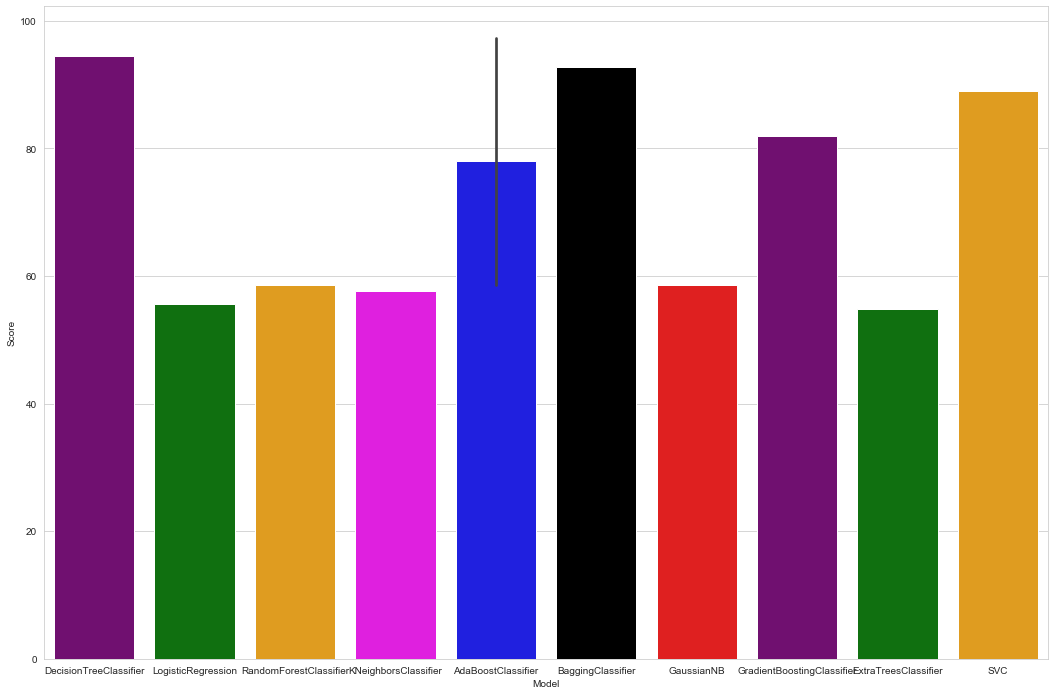

In [52]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(18,12))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [53]:
df.head(3)

,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,916,103916,1,15,7350,1,1.43,2,1
1,916,103917,1,16,17861,2,1.82,2,0
2,916,103920,1,20,693,0,0.00,1,0


In [54]:
import sklearn.cluster as cluster

In [55]:
kmns=cluster.KMeans(n_clusters=5)

In [56]:
kmns=kmns.fit(df[['fb_campaign_id','gender']])

In [57]:
kmns.cluster_centers_

array([[1.44631353e+05, 5.77358491e-01],
       [1.15950752e+05, 4.77876106e-01],
       [1.79926211e+05, 4.52631579e-01],
       [1.08261216e+05, 4.65686275e-01],
       [1.23606080e+05, 4.54545455e-01]])

In [58]:
df['fb_campaign_id by gender']=kmns.labels_

In [59]:
from sklearn.cluster import KMeans 

In [60]:
k_range=range(1,15)
wss=[]

In [61]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['fb_campaign_id','gender']])
    wss.append(km.inertia_)
    

In [62]:
wss

[479939950687.25635,
 117463820257.95444,
 17108054764.829813,
 5146795812.3366995,
 1434957979.719618,
 167329292.19149184,
 57066298.774767615,
 31894461.103239313,
 11099599.688566549,
 8069437.635316632,
 6760678.005015261,
 5268057.225010329,
 4355726.542473888,
 3588255.5320134424]

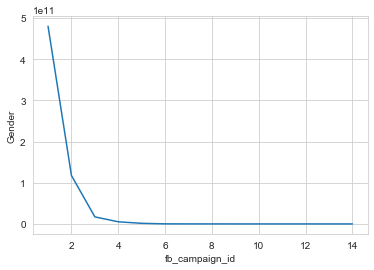

In [63]:
plt.xlabel('fb_campaign_id')
plt.ylabel('Gender')
plt.plot(k_range,wss)

In [64]:
kmns=cluster.KMeans(n_clusters=5)

In [65]:
kmns=kmns.fit(df[['fb_campaign_id','interest']])

In [66]:
kmns.cluster_centers_

array([[1.79926211e+05, 1.07000000e+02],
       [1.15950752e+05, 2.58407080e+01],
       [1.44631353e+05, 2.73169811e+01],
       [1.08261216e+05, 2.41715686e+01],
       [1.23606080e+05, 2.31590909e+01]])

In [67]:
df['fb_campaign_id by interest']=kmns.labels_

In [68]:
k_range=range(1,15)
wss=[]

In [70]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['fb_campaign_id','interest']])
    wss.append(km.inertia_)

In [71]:
wss

[479940779970.504,
 117464588328.53154,
 17108311330.325737,
 5147052273.715166,
 1435213985.6675897,
 167584948.330836,
 57321827.02538334,
 32150002.542510744,
 11354796.660279922,
 8318334.997775916,
 6903845.6732438505,
 5516821.687627688,
 4452452.800692911,
 3784205.793718436]

In [72]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['fb_campaign_id','Impressions']])
kmns.cluster_centers_

array([[ 150809.9047619 , 1055938.58730159],
       [ 148480.93534483,  229308.11206897],
       [ 151366.61320755,  563517.53773585],
       [ 125073.41032609,   28488.44293478],
       [ 144601.33333333, 2168477.        ]])

In [74]:
df['fb_campaign_id by Impressions']=kmns.labels_

In [76]:
k_range=range(1,15)
wss=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['fb_campaign_id','Impressions']])
    wss.append(km.inertia_)

In [77]:
wss

[112190589216371.66,
 34143865444137.67,
 18554926732563.785,
 11053771082491.184,
 6971545446189.01,
 4888159699998.546,
 3665688171529.625,
 2866574794244.8486,
 2302466723270.7754,
 1792609029528.5078,
 1454296735808.061,
 1213326995488.5208,
 1034212411208.6465,
 887883295138.2712]

In [78]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['fb_campaign_id','Clicks']])
kmns.cluster_centers_

array([[1.44631353e+05, 5.77641509e+01],
       [1.08261216e+05, 3.97549020e+00],
       [1.79926211e+05, 5.74000000e+01],
       [1.23606080e+05, 9.65909091e-01],
       [1.15950752e+05, 5.31415929e+00]])

In [80]:
df['fb_campaign_id by Clicks']=kmns.labels_

In [82]:
k_range=range(1,15)
wss=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['fb_campaign_id','Clicks']])
    wss.append(km.inertia_)

In [83]:
wss

[479943646769.8443,
 117466700749.62524,
 17110935247.071182,
 5149676292.79979,
 1437837262.6758447,
 170208317.22562653,
 59945283.58949361,
 34773414.177258745,
 13978196.993409341,
 10942484.957408901,
 9009858.838544697,
 7722285.516942078,
 6789555.54163359,
 5890917.185114834]

In [84]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['fb_campaign_id','Spent']])
kmns.cluster_centers_

array([[1.08261216e+05, 5.69441177e+00],
       [1.44631353e+05, 9.01728867e+01],
       [1.79926211e+05, 8.28475788e+01],
       [1.23606080e+05, 1.33250000e+00],
       [1.15950752e+05, 7.80601770e+00]])

In [88]:
df['fb_campaign_id by Spent']=kmns.labels_

In [89]:
k_range=range(1,15)
wss=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['fb_campaign_id','Spent']])
    wss.append(km.inertia_)

In [90]:
wss

[479948576011.3635,
 117470485606.45157,
 17114715791.719646,
 5153456828.295222,
 1441616341.460682,
 173987029.3387897,
 63723956.41232087,
 38551828.521830514,
 17756186.85645949,
 13579307.140499141,
 10583762.06570531,
 9535142.976704895,
 8267317.142757503,
 7074297.833076162]

In [92]:
df.head(3)
df.columns

Index(['xyz_campaign_id', 'fb_campaign_id', 'gender', 'interest',
       'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'fb_campaign_id by gender',
       'fb_campaign_id by interest', 'Age by Experience',
       'fb_campaign_id by Impressions', 'fb_campaign_id by Clicks',
       'fb_campaign_id by Spent'],
      dtype='object')

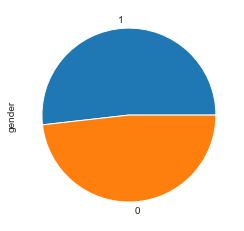

In [94]:

df.gender.value_counts().plot(kind='pie')

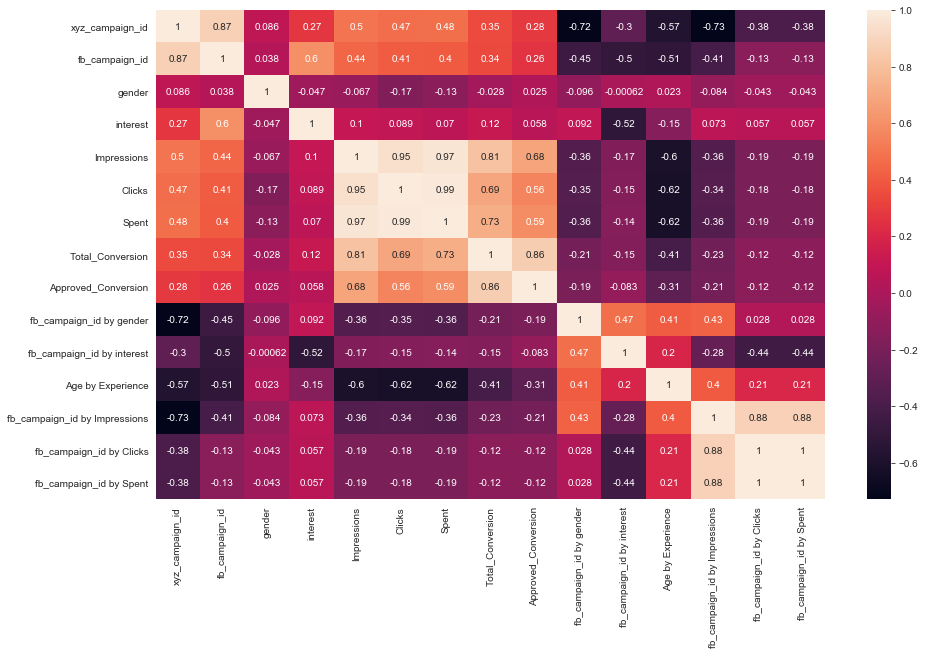

In [96]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

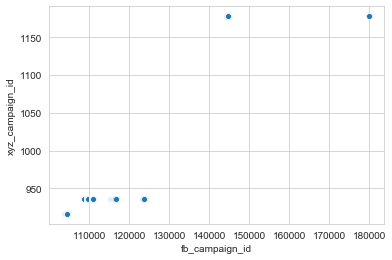

In [98]:
sns.scatterplot(x='fb_campaign_id',y='xyz_campaign_id',data=df)

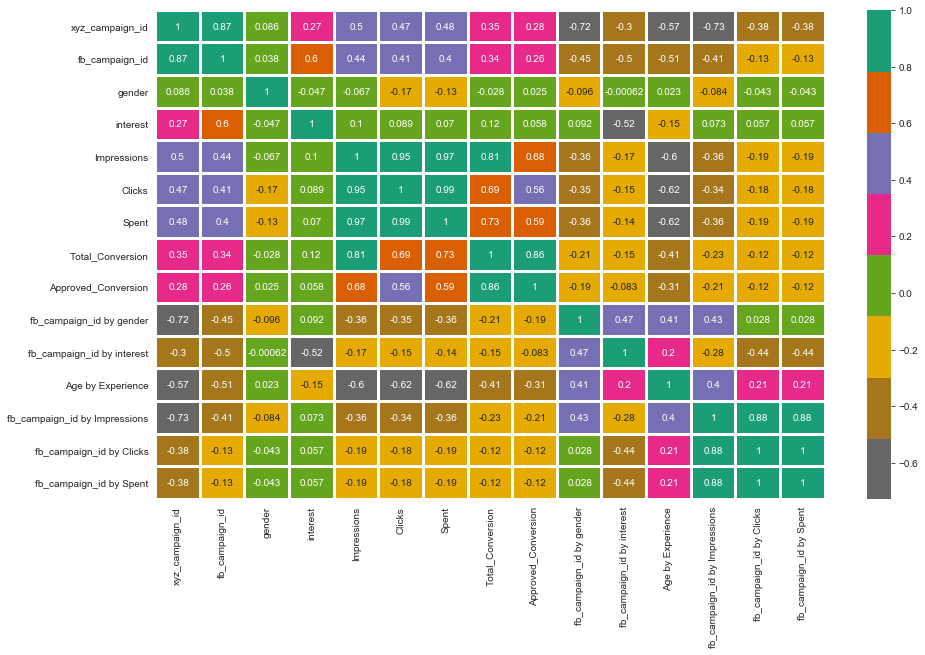

In [99]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

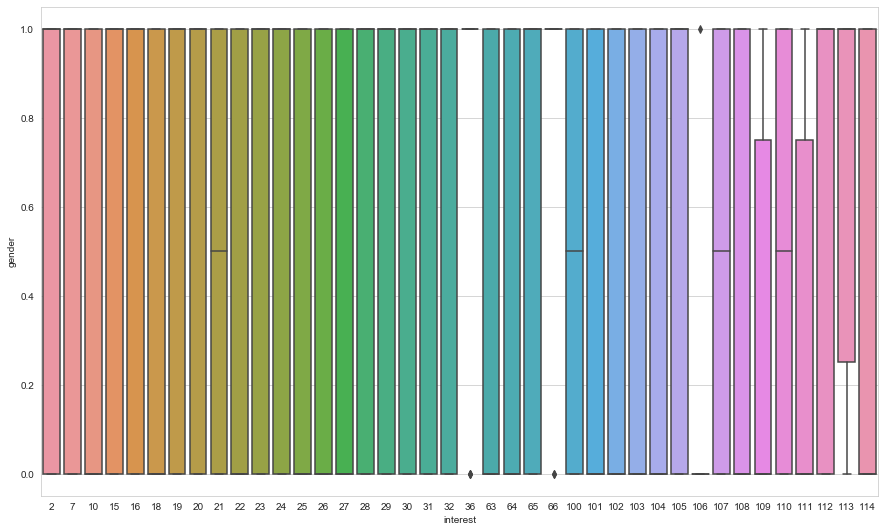

In [101]:
plt.figure(figsize=(15,9))
sns.boxplot(x='interest',y='gender',data=df)

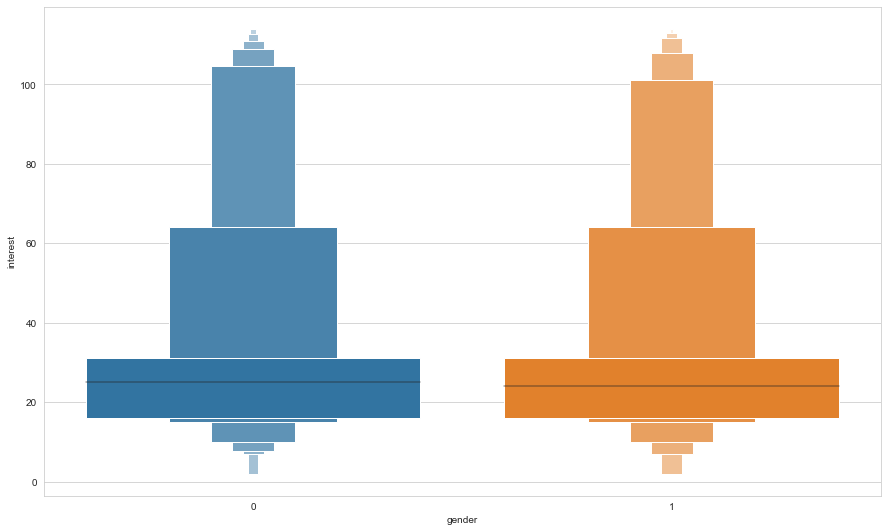

In [103]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='gender',y='interest',data=df)

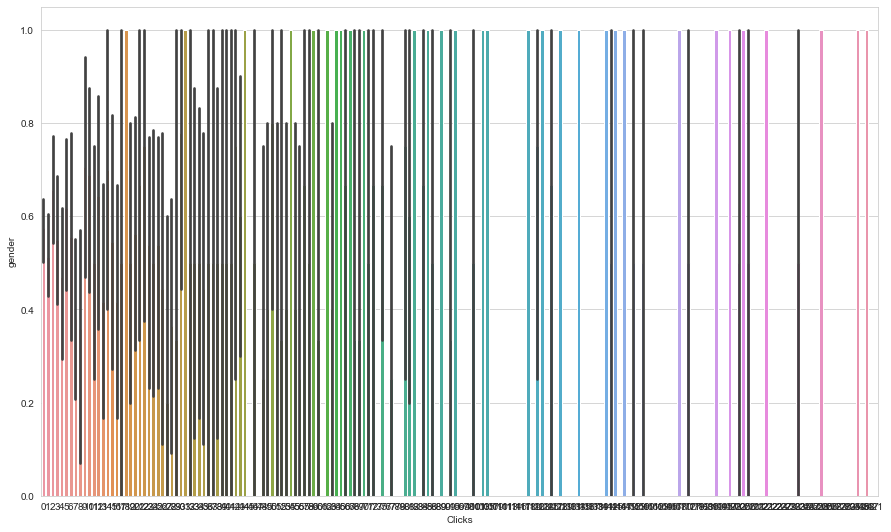

In [105]:
plt.figure(figsize=(15,9))
sns.barplot(x='Clicks',y='gender',data=df)

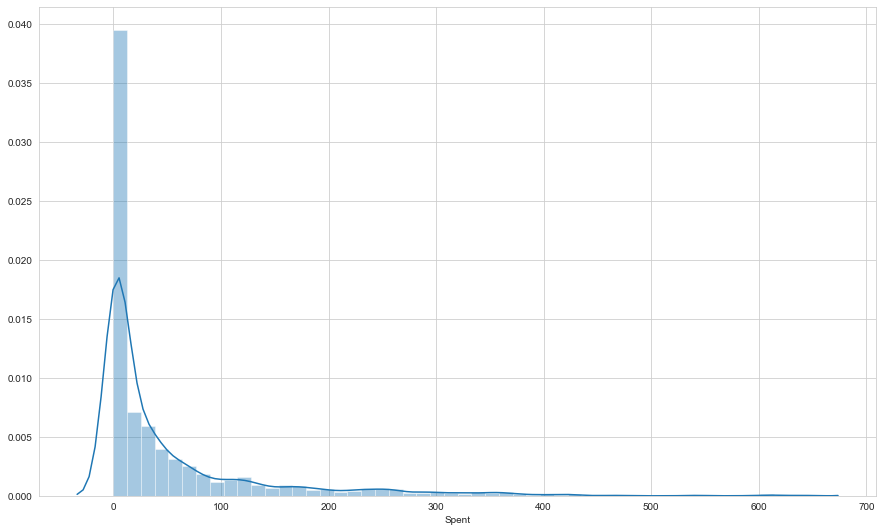

In [106]:
plt.figure(figsize=(15,9))
sns.distplot(df['Spent'])

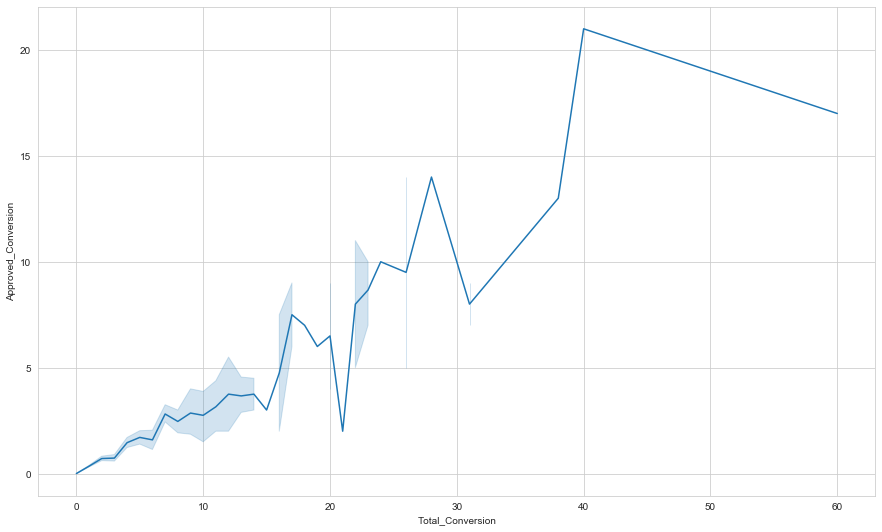

In [107]:
plt.figure(figsize=(15,9))
sns.lineplot(x='Total_Conversion',y='Approved_Conversion',data=df)

In [109]:
df.columns

Index(['xyz_campaign_id', 'fb_campaign_id', 'gender', 'interest',
       'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'fb_campaign_id by gender',
       'fb_campaign_id by interest', 'Age by Experience',
       'fb_campaign_id by Impressions', 'fb_campaign_id by Clicks',
       'fb_campaign_id by Spent'],
      dtype='object')

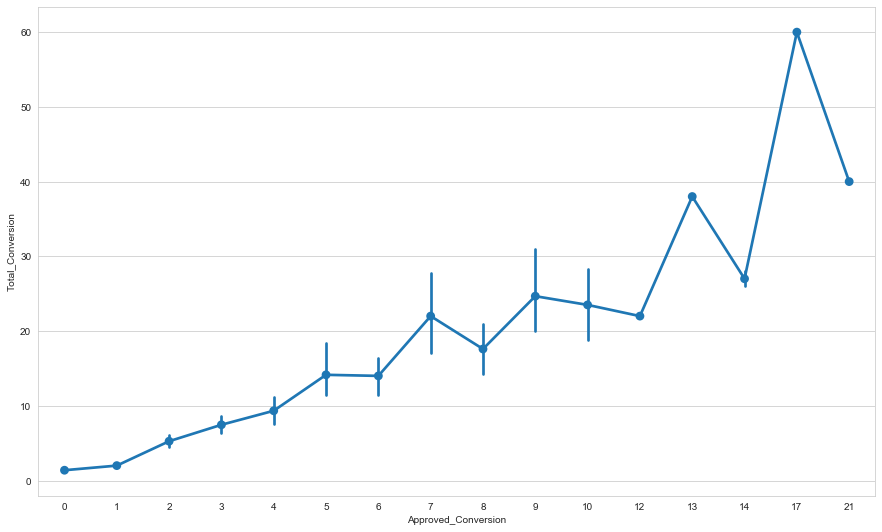

In [110]:
plt.figure(figsize=(15,9))
sns.pointplot(x='Approved_Conversion',y='Total_Conversion',data=df)

<Figure size 1080x648 with 0 Axes>

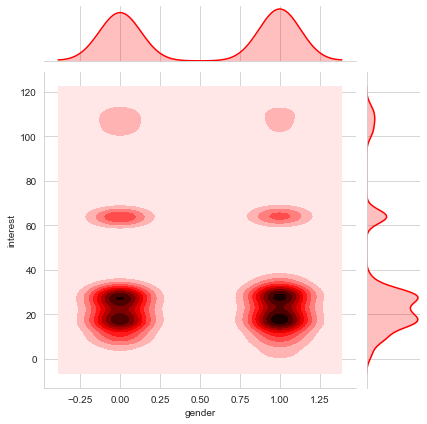

In [111]:
plt.figure(figsize=(15,9))
sns.jointplot(x='gender',y='interest',data=df,kind='kde',color='red')

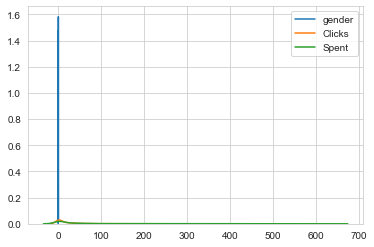

In [112]:
sns.kdeplot(df['gender'])
sns.kdeplot(df['Clicks'])
sns.kdeplot(df['Spent'])

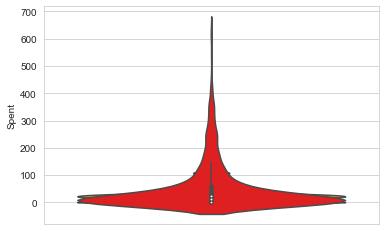

In [113]:
sns.violinplot(y="gender",data=df)
sns.violinplot(y="interest",data=df,color='orange')
sns.violinplot(y="Spent",data=df,color='red')

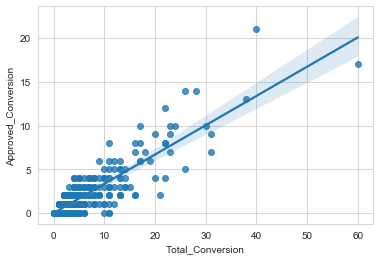

In [114]:
sns.regplot(x=df["Total_Conversion"], y=df["Approved_Conversion"], 
data=df)

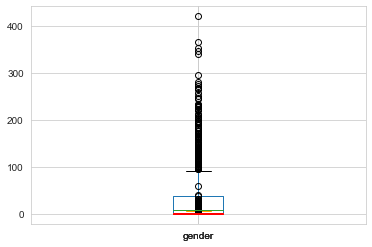

In [115]:
df.boxplot(column="Clicks")
df.boxplot(column="Total_Conversion",color='orange')
df.boxplot(column="gender",color='red')

In [116]:
import sweetviz as sv

In [117]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [118]:
from IPython.display import IFrame

In [119]:
IFrame(src='Analyze.html',width=1000,height=600)

In [120]:
df.columns

Index(['xyz_campaign_id', 'fb_campaign_id', 'gender', 'interest',
       'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'fb_campaign_id by gender',
       'fb_campaign_id by interest', 'Age by Experience',
       'fb_campaign_id by Impressions', 'fb_campaign_id by Clicks',
       'fb_campaign_id by Spent'],
      dtype='object')

In [121]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [122]:
man=MinMaxScaler()
feat=['xyz_campaign_id', 'fb_campaign_id', 'gender', 'interest',
       'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion']
df[feat]=man.fit_transform(df[feat])
df[feat]

,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,0.0,0.000000,1.0,0.116071,0.002380,0.002375,0.002235,0.033333,0.047619
1,0.0,0.000013,1.0,0.125000,0.005824,0.004751,0.002844,0.033333,0.000000
2,0.0,0.000053,1.0,0.160714,0.000199,0.000000,0.000000,0.016667,0.000000
3,0.0,0.000158,1.0,0.232143,0.001367,0.002375,0.001953,0.016667,0.000000
4,0.0,0.000158,1.0,0.232143,0.001326,0.002375,0.002016,0.016667,0.047619
...,...,...,...,...,...,...,...,...,...
1138,1.0,0.999934,0.0,0.955357,0.370156,0.598575,0.559716,0.216667,0.095238
1139,1.0,0.999947,0.0,0.964286,0.208873,0.285036,0.271709,0.050000,0.000000
1140,1.0,0.999961,0.0,0.973214,0.049623,0.066508,0.062958,0.033333,0.000000
1141,1.0,0.999987,0.0,0.991071,0.258908,0.320665,0.310509,0.133333,0.095238


In [123]:
man=StandardScaler()
feat=['xyz_campaign_id', 'fb_campaign_id', 'gender', 'interest',
       'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion']
df[feat]=man.fit_transform(df[feat])
df[feat]

,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,-1.245164,-1.457591,0.964750,-0.659472,-0.573793,-0.569573,-0.574772,-0.190922,0.032236
1,-1.245164,-1.457542,0.964750,-0.622353,-0.540171,-0.551988,-0.570282,-0.190922,-0.543486
2,-1.245164,-1.457396,0.964750,-0.473877,-0.595087,-0.587157,-0.591233,-0.414055,-0.543486
3,-1.245164,-1.457005,0.964750,-0.176924,-0.583680,-0.569573,-0.576844,-0.414055,-0.543486
4,-1.245164,-1.457005,0.964750,-0.176924,-0.584083,-0.569573,-0.576383,-0.414055,0.032236
...,...,...,...,...,...,...,...,...,...
1138,0.909863,2.254270,-1.036538,2.829719,3.016521,3.844193,3.532036,2.263541,0.607959
1139,0.909863,2.254319,-1.036538,2.866838,1.442036,1.523009,1.410369,0.032211,-0.543486
1140,0.909863,2.254368,-1.036538,2.903957,-0.112598,-0.094785,-0.127439,-0.190922,-0.543486
1141,0.909863,2.254465,-1.036538,2.978196,1.930492,1.786780,1.696198,1.147876,0.607959
